In [1]:
import sys
sys.path.append("../codes/")
from Readfiles import getFnames
from DCdata import readReservoirDC_all
%pylab inline

Efficiency Warning: Interpolation will be slow, use setup.py!

            python setup.py build_ext --inplace
    
Populating the interactive namespace from numpy and matplotlib


In [2]:
directory = "../data/ChungCheonDC/"

In [3]:
fnames = getFnames(directory, dtype="apr", minimumsize=7000.)

In [4]:
fname_temp

NameError: name 'fname_temp' is not defined

In [5]:
fname_temp = fnames[0]
dat_temp,height_temp, ID = readReservoirDC_all(directory+fname_temp)

In [6]:
ntimes = len(fnames)
DATA = np.zeros((dat_temp.shape[0], ntimes))*np.nan
height = np.ones(ntimes)*np.nan

In [7]:
DATA.shape

(380L, 1269L)

In [8]:
for i, fname in enumerate(fnames):
    dat_temp,height_temp, ID = readReservoirDC_all(directory+fname)
    if dat_temp.shape[0] == 380:        
        DATA[:,i] = dat_temp[:,-1]
        height[i] = height_temp[0]      
    else:
        print fname

20150103180000.apr
20150106180000.apr
20150109120000.apr
20150112120000.apr
20150117120000.apr
20150120120000.apr
20150123120000.apr
20150126120000.apr
20150127000000.apr
20150129060000.apr
20150201000000.apr
20150204000000.apr
20150207000000.apr
20150209180000.apr
20150212180000.apr
20150215180000.apr
20150218120000.apr
20150221060000.apr
20150224120000.apr
20150227060000.apr
20150228000000.apr
20150302000000.apr
20150305000000.apr
20150308000000.apr
20150329000000.apr
20150401000000.apr
20150403180000.apr
20150404120000.apr
20150406180000.apr
20150409000000.apr
20150412120000.apr
20150415060000.apr
20150418000000.apr
20150421000000.apr
20150424000000.apr


In [9]:
a = ['1', '2', '3']

In [10]:
def strtofloat(input):
    temp = ""
    for i in input:
        temp += i 
    return float(temp)


In [11]:
# dat_temp,height_temp, datalist = readReservoirDC_all(fnames[79])
# print fnames[79]
# # datalist = readReservoirDC_all(fnames[79])

In [56]:
print fnames[705]

20150721000000.apr


In [57]:
locs = dat_temp[:,:4]

In [58]:
mida = locs[:,:2].sum(axis=1)
midb = locs[:,2:].sum(axis=1)
mid = (mida + midb)*0.5
dz = mida-midb

In [59]:
from ipywidgets import interact, IntSlider

In [60]:
from scipy import interpolate

In [68]:
x = np.linspace(mid.min(), mid.max(), 100)
z = np.linspace(dz.min(), dz.max(), 100)
# grid_x, grid_z = np.mgrid[np.min(mid):np.max(mid), np.min(dz):np.max(dz)]
grid_x, grid_z = np.meshgrid(x,z)

def vizDCtimeSeries(idatum, itime):
#     idatum = 0
    figsize(8,6)
    fig = plt.figure()
    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)    
#     ax1.plot(mid, dz, '.')

    grid_rho = griddata(mid, dz, DATA[:,itime], grid_x, grid_z, interp='linear')
    grid_rho = grid_rho.reshape(grid_x.shape)
    vmin, vmax = 50, 200.
    ax1.contourf(grid_x, grid_z, grid_rho, 100, vmin =vmin, vmax = vmax, clim=(vmin, vmax), cmap="jet")    
    ax1.contourf(grid_x, grid_z, grid_rho, 100, vmin =vmin, vmax = vmax, clim=(vmin, vmax), cmap="jet")        
    ax1.scatter(mid, dz, s=20, c = DATA[:,itime], edgecolor="None", vmin =vmin, vmax = vmax, clim=(vmin, vmax))
#     ax1.plot(grid_x.flatten(), grid_z.flatten(), 'k.')
    ax1.plot(mid[idatum], dz[idatum], 'ro')    
    ax2.plot(DATA[idatum,:], 'k-', lw=2)
    ax2.set_yscale('log')
    ax2.set_ylim(vmin, vmax)
    ax2_1 = ax2.twinx()
    ax2_1.plot(height)
    ax2_1.set_ylim(15, 21.)
    ax2_1.plot(np.r_[itime, itime], np.r_[15, 21.], 'k--', lw=1)
    ax1.text(0,0, fnames[itime])

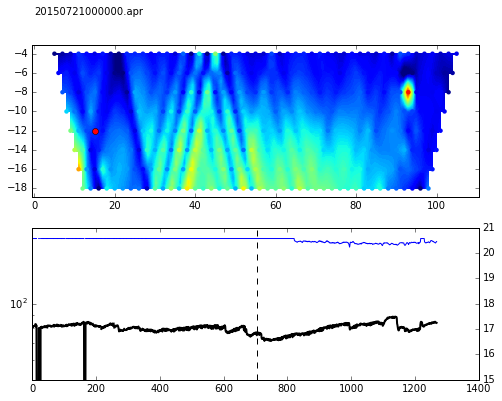

In [65]:
interact(vizDCtimeSeries, idatum=IntSlider(min=0, max=300, step=10, value=0), 
        itime=IntSlider(min=0, max=DATA.shape[1]-1, step=100, value=705))

In [21]:
def vizDCtimeSeriesVariation(idatum, itime):
#     idatum = 0
    figsize(8,6)
    fig = plt.figure()
    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)    
#     ax1.plot(mid, dz, '.')
    itime_ref = 101
    DATA_ref = DATA[:,itime_ref]
    grid_rho = griddata(mid, dz, DATA[:,itime]/DATA_ref, grid_x, grid_z, interp='linear')
    grid_rho = grid_rho.reshape(grid_x.shape)
    vmin, vmax = 0.9, 1.1
    ax1.contourf(grid_x, grid_z, grid_rho, 100, vmin =vmin, vmax = vmax, clim=(vmin, vmax), cmap="jet")    
    ax1.contourf(grid_x, grid_z, grid_rho, 100, vmin =vmin, vmax = vmax, clim=(vmin, vmax), cmap="jet")        
    ax1.scatter(mid, dz, s=20, c = DATA[:,itime]/DATA_ref, edgecolor="None", vmin =vmin, vmax = vmax, clim=(vmin, vmax))
#     ax1.plot(grid_x.flatten(), grid_z.flatten(), 'k.')
    ax1.plot(mid[idatum], dz[idatum], 'ro')    
    ax2.plot(DATA[idatum,:], 'k-', lw=2)
    ax2.set_yscale('log')
    vmin, vmax = 50., 200.
    ax2.set_ylim(vmin, vmax)
    ax2_1 = ax2.twinx()
    ax2_1.plot(height)
    ax2_1.set_ylim(15, 21.)
    ax2_1.plot(np.r_[itime, itime], np.r_[15, 21.], 'k--', lw=1)
    ax1.text(0,0, fnames[itime])

<function __main__.vizDCtimeSeriesVariation>

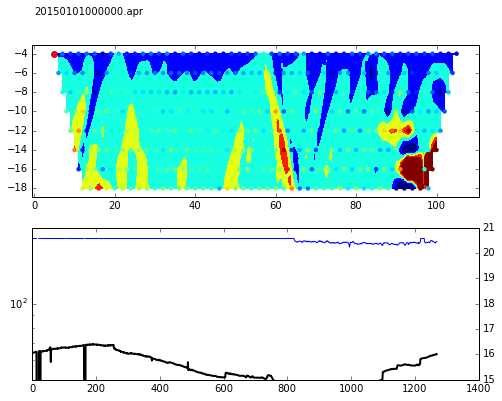

In [22]:
interact(vizDCtimeSeriesVariation, idatum=IntSlider(min=0, max=300, step=1, value=0), 
        itime=IntSlider(min=0, max=DATA.shape[1]-1, step=4, value=0))

In [23]:
DATA.shape

(380L, 1269L)

In [24]:
x = np.linspace(mid.min(), mid.max(), 100)
z = np.linspace(dz.min(), dz.max(), 40)

In [25]:
print z.min(), z.max()
print x.min(), x.max()

-18.0 -4.0
5.0 105.0


In [26]:
np.diff(x)

array([ 1.01010101,  1.01010101,  1.01010101,  1.01010101,  1.01010101,
        1.01010101,  1.01010101,  1.01010101,  1.01010101,  1.01010101,
        1.01010101,  1.01010101,  1.01010101,  1.01010101,  1.01010101,
        1.01010101,  1.01010101,  1.01010101,  1.01010101,  1.01010101,
        1.01010101,  1.01010101,  1.01010101,  1.01010101,  1.01010101,
        1.01010101,  1.01010101,  1.01010101,  1.01010101,  1.01010101,
        1.01010101,  1.01010101,  1.01010101,  1.01010101,  1.01010101,
        1.01010101,  1.01010101,  1.01010101,  1.01010101,  1.01010101,
        1.01010101,  1.01010101,  1.01010101,  1.01010101,  1.01010101,
        1.01010101,  1.01010101,  1.01010101,  1.01010101,  1.01010101,
        1.01010101,  1.01010101,  1.01010101,  1.01010101,  1.01010101,
        1.01010101,  1.01010101,  1.01010101,  1.01010101,  1.01010101,
        1.01010101,  1.01010101,  1.01010101,  1.01010101,  1.01010101,
        1.01010101,  1.01010101,  1.01010101,  1.01010101,  1.01

In [27]:
from SimPEG import Mesh
from scipy import interpolate

In [28]:
hx = np.ones(110)*1.
hz = np.ones(40)*0.5
mesh2D = Mesh.TensorMesh([hx,hz], x0 = '0N')

In [29]:
len(range(90,900,4))

203

In [30]:
timeind = range(0,1200,16)
hy = np.ones(len(timeind))
mesh = Mesh.TensorMesh([hx,hy,hz], x0 = '0N0')
itime_ref = 101
DATA_ref = DATA[:,itime_ref]
print "reference data", fnames[itime_ref]
# model = np.zeros((mesh2D.nC,len(timeind)))
# model_ratio = model.copy()
MODEL = np.zeros((mesh.nCx, mesh.nCy, mesh.nCz))
MODEL_ratio = np.zeros((mesh.nCx, mesh.nCy, mesh.nCz))
for i, itime in enumerate(timeind) :
    print itime
    F = interpolate.LinearNDInterpolator(np.c_[mid, dz], DATA[:,itime])
    F_ratio = interpolate.LinearNDInterpolator(np.c_[mid, dz], abs(DATA[:,itime]-DATA_ref)/abs(DATA_ref))
    MODEL[:,i,:] = F(mesh2D.gridCC).reshape((mesh.nCx, mesh.nCz), order="F")
    MODEL_ratio[:,i,:] = F_ratio(mesh2D.gridCC).reshape((mesh.nCx, mesh.nCz), order="F")

reference data 20150126000000.apr
0
16
32
48
64
80
96
112
128
144
160
176
192
208
224
240
256
272
288
304
320
336
352
368
384
400
416
432
448
464
480
496
512
528
544
560
576
592
608
624
640
656
672
688
704
720
736
752
768
784
800
816
832
848
864
880
896
912
928
944
960
976
992
1008
1024
1040
1056
1072
1088
1104
1120
1136
1152
1168
1184


In [31]:
from SimPEG import Utils

In [32]:
Model = Utils.mkvc(MODEL[:,:,:])
Model_ratio = Utils.mkvc(MODEL_ratio[:,:,:])

In [33]:
Model[np.isnan(Model)] = 1e-8
Model_ratio[np.isnan(Model_ratio)] = 1e-8

In [34]:
# mesh.writeModelUBC("/Users/sgkang/Dropbox/dammodel.txt", Model)
# mesh.writeModelUBC("/Users/sgkang/Dropbox/dammodel_ratio.txt", Model_ratio)
# mesh.writeUBC("/Users/sgkang/Dropbox/dammodel_mesh.txt")
mesh.writeModelUBC("dammodel.txt", Model)
mesh.writeModelUBC("dammodel_ratio.txt", Model_ratio)
mesh.writeUBC("dammodel_mesh.txt")

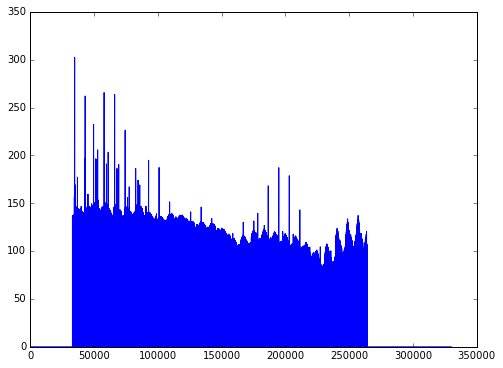

In [35]:
plot(Model)

(<matplotlib.collections.QuadMesh at 0x9cd8ef0>,)

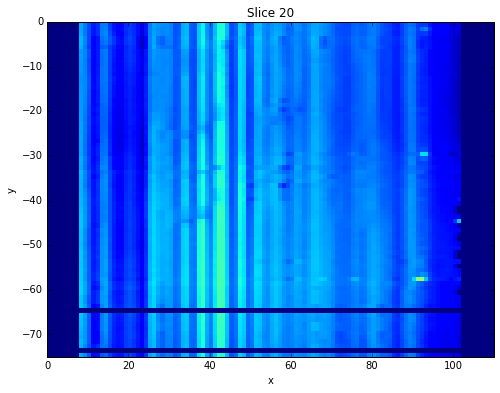

In [36]:
mesh.plotSlice(Model, clim=(50., 200.))

In [37]:
dzu = np.unique(dz)

In [38]:
def profile_time(i_n, color):
    figsize(6,3)
    ind = np.argwhere(dz == dzu[::-1][i_n])
    nskip = 5
    for i in range(0,ind.size,nskip):
        plt.semilogy(DATA[ind.flatten()[i],:], color)
        plt.tight_layout()
    plt.ylim(50, 200)    


C:\Users\sungkeun\Anaconda2\lib\site-packages\matplotlib\scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


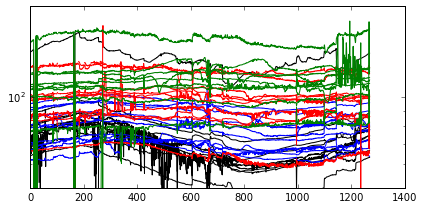

In [39]:
colors = ['k', 'b', 'r', 'g']
inds = [0, 2, 4, 6]
for i, ind in enumerate(inds):
    profile_time(ind,colors[i])

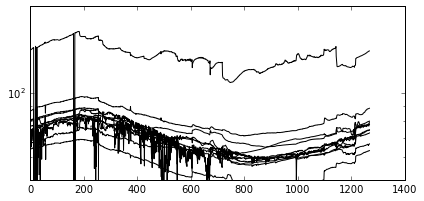

In [40]:
profile_time(0, 'k')

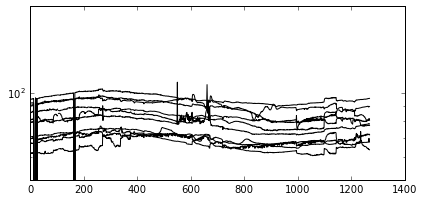

In [41]:
profile_time(2, 'k')

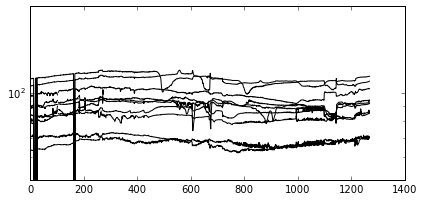

In [42]:
profile_time(3, 'k')

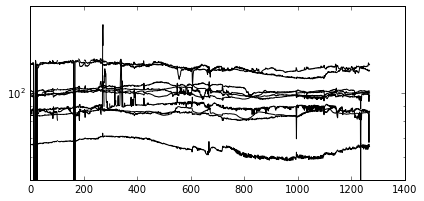

In [43]:
profile_time(4, 'k')

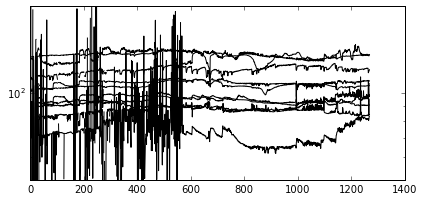

In [44]:
profile_time(5, 'k')

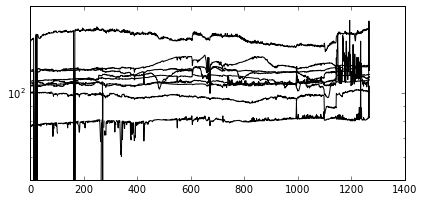

In [45]:
profile_time(6, 'k')

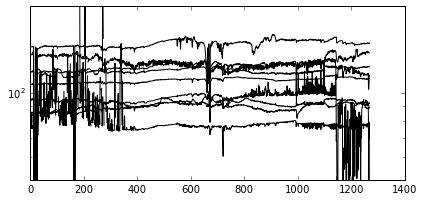

In [46]:
profile_time(7, 'k')